In [2]:
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Lista 11 cz. 2 (3 pkt.)

## Zadanie 1 (3 pkt.)

Przeprowadź kwantowy atak na szyfr Evena-Mansoura. W tym szyfrze do wiadomości dodajemy za pomocą XORa klucz $k_1$, następnie stosujemy SBox $P$, który zamienia wejściowy ciąg bitów na podany w tabeli (jest to tylko przykładowy, prosty SBox):
$$\begin{array}{|c|c|}
\hline
x&P(x)\\
\hline
000&010\\
001&110\\
010&100\\
011&101\\
100&000\\
101&111\\
110&001\\
111&011\\
\hline
\end{array}
$$
a następnie dodajemy za pomocą XORa $k_2$.

<img src="Even_Mansour.png" width="500"/>

Załóżmy, że znamy pary wiadomość-szyfrogram podane w tabeli:
$$\begin{array}{|c|c|}
\hline
M&E(M)\\
\hline
000&011\\
001&010\\
010&000\\
011&100\\
100&101\\
101&111\\
110&001\\
111&110\\
\hline
\end{array}
$$
Znajdź klucze $k_1$ oraz $k_2$ za pomocą kwantowego algorytmu Simona.

W tym celu definujemy funkcję:
$$f(x)=E(x)\oplus P(x)$$

W algorytmie Simona potrzebujemy dwa razy tyle kubitów ile bitów ma szyfr, czyli w tym przypadku 6:

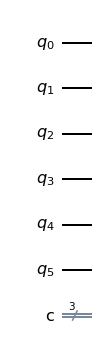

In [31]:
qc = QuantumCircuit(6,3)

qc.draw(output='mpl')

następnie na trzy pierwsze kubity aplikujemy bramki Hadamarda tworząc superpozycję wszytskich możliwych ciągów 3-bitowych:

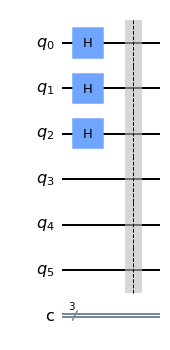

Teraz musimy zaimplementować obwód kwantowy $U_f$, który stan:
$$|x\rangle|0\rangle$$
przekształci w stan:
$$|x\rangle|f(x)\rangle=U_f|x\rangle|0\rangle$$
Skonstruuj ten obwód. Najpierw wyznacz wartości funkcji $f$ dla wszystkich $x$ (ciągów 3-bitowych) a następnie wydedukuj jak skonstruować odpowiedni obwód $U_f$.

Wskazówka: do skonstruowania tego obwodu wystarczą jedynie bramki **CNOT** oraz jedna bramka **X**.

Uwaga: Na poniższym obwodzie zamiast bramki $U_f$ umieść układ bramek **CNOT**, które będą implementowały działanie operatora $U_f$.

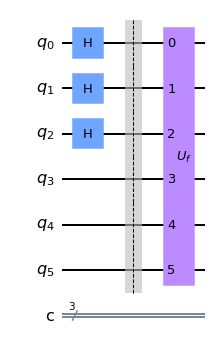

następnie na trzy pierwsze kubity ponownie aplikujemy bramki Hadamarda:

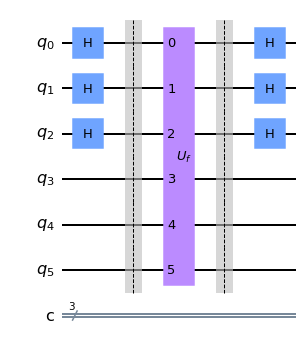

i dokonujemy na nich pomiarów:

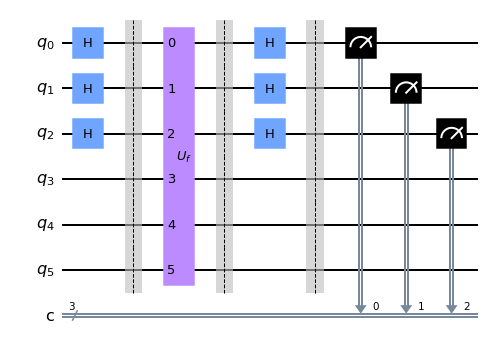

Oznaczmy za pomocą $z_i$ kolejne wyniki pomiarów. Tzn. uruchamiamy obwód z **shots=1** i kolejno uzyskiwane ciągi trzech bitów dają kolejne $z_i$. Szukany przez nas klucz $k_1$ spełnia układ równań:
$$k_1\cdot z_i=0\quad\forall i$$
Gdzie operacja $\cdot$ to iloczyn skalarny ciągów bitów potraktowanych jako wektory, z XORem zamiast dodawania, czyli $a_0a_1a_2\cdot b_0b_1b_2=a_0b_0\oplus a_1b_1\oplus a_2b_2$.

Znajdź wszytskie $z_i$ a następnie znajdź $k_1$.

Teraz, poza znajomością SBoxa $P$ i par wiadomość-szyfrogram, znamy $k_1$. Zastanów się, jak mając te informacje znaleźć $k_2$ i znajdź.